In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/edwinhuang/Downloads/validation_results3.csv', index_col = 0)
df2 = pd.read_csv('/Users/edwinhuang/Downloads/validation_results4.csv', index_col = 0)

In [3]:
df_combined = pd.concat([df, df2], ignore_index=True)
df_combined
df = df_combined

In [8]:
df = df.reset_index(names = "ID")

In [9]:
df.to_csv('/Users/edwinhuang/Downloads/validation_results_full.csv')

In [7]:
# # Remove unnecessary column
# df = df.drop(columns=['Unnamed: 0'])

# # Convert DateTime to a proper datetime format
# df['DateTime'] = pd.to_datetime(df['DateTime'])

# # Set up histograms of validation scores grouped by different parameters
# grouping_parameters = ['ModelType', 'SystemPrompt', 'DocumentStoreVersion']

# for param in grouping_parameters:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=df, x="Validation_score", hue=param, kde=True, bins=20, alpha=0.5)
#     plt.title(f'Distribution of Validation Scores by {param}')
#     plt.xlabel('Validation Score')
#     plt.ylabel('Frequency')
#     plt.legend(title=param)
#     plt.show()

# # Perform ANOVA to test for significant differences in validation scores
# anova_results = {}

# for param in grouping_parameters:
#     grouped_scores = [group["Validation_score"].dropna().values for _, group in df.groupby(param) if len(group) > 1]
    
#     if len(grouped_scores) > 1:  # Ensure at least two groups to compare
#         f_stat, p_value = stats.f_oneway(*grouped_scores)
#         anova_results[param] = {"F-statistic": f_stat, "P-value": p_value}

# # Display statistical test results
# anova_results

In [88]:
system_prompt_filters

{'0': 'You are an expert bioinformatics assistant specializing in GenePattern workflows. Your role is to guide users in using bioinformatics tools with clear, structured, and step-by-step explanations. \n\n- **When an image is included**, provide a detailed description of its content and relevance to bioinformatics. \n- **If a requested tool is not found in the vector store**, respond with: "That tool is not currently available in GenePattern. You may suggest adding it by contacting the GenePattern team at edh021@cloud.ucsd.edu."\n- **Always specify the required input file formats** when explaining how to use tools and modules.\n- **Only recommend GenePattern modules**, avoiding external tools unless explicitly requested.\n- **Never instruct users to manually log in**; instead, guide them through the workflow directly.\n\nAssume the user is an undergraduate biology student with minimal programming knowledge. Use a structured format (e.g., numbered steps, bullet points) to improve reada

In [90]:
df.columns

Index(['DateTime', 'ModelType', 'SystemPrompt', 'DocumentStoreVersion',
       'UserPrompt', 'Response', 'real_answer', 'Validation_feedback',
       'Validation_score', 'Validation_refinement', 'Usage_InputTokens',
       'Usage_OutputTokens', 'Usage_TotalTokens'],
      dtype='object')

In [96]:
system_prompt_filters = {str(k): v for k, v in enumerate(df.SystemPrompt.unique())}

doc_filter = 'empty'
systemprompt_filter = system_prompt_filters['0']
df_filtered = df[(df.DocumentStoreVersion == doc_filter) & (df.SystemPrompt == systemprompt_filter)]
grouped = df_filtered.groupby(['UserPrompt', 'real_answer'])

grouped_data = []
for (user_prompt, real_answer), group in grouped:
    grouped_data.append({
        "UserPrompt": user_prompt,
        'RealAnswer': real_answer,
        "responses": group.to_dict(orient="records")  # Convert grouped rows to dictionary
    })


grouped_data[0]

{'UserPrompt': '\n\nAs many of you may have heard, and those of you who are registered \nGenomeSpace should have read in an email, the GenomeSpace project is coming \nto an end *tomorrow* *November 15, 2019.*\n\nPlease* read our blog post \n<http://bit.ly/GenomeSpace-Project-is-Ending-GP-Blog>* for information \nregarding the impact on GenePattern users.\n\nSincerely, \nThe GenePattern team\n    \n ',
 'RealAnswer': '\n\nAs many of you may have heard, and those of you who are registered \nGenomeSpace should have read in an email, the GenomeSpace project is coming \nto an end *tomorrow* *November 15, 2019.*\n\nPlease* read our blog post \n<http://bit.ly/GenomeSpace-Project-is-Ending-GP-Blog>* for information \nregarding the impact on GenePattern users.\n\nSincerely, \nThe GenePattern team\n    \n ',
 'responses': [{'DateTime': '2025-02-07T18:14:49.926851',
   'ModelType': 'llama',
   'SystemPrompt': 'You are an expert bioinformatics assistant specializing in GenePattern workflows. Your 

In [17]:
df['Usage_TotalTokens'].sum()/3 

22100461.333333332

In [18]:
df['Usage_InputTokens'].sum()/3 * 2.5/1000000

52.53215416666667

In [19]:
df['Usage_OutputTokens'].sum()/3 * 10/1000000

10.875996666666667

In [20]:
unique_prompts = df.SystemPrompt.unique()

In [21]:
system_prompts = {}
for i in range(len(unique_prompts)):
    system_prompts[i] = unique_prompts[i]

system_prompts

{0: 'You are an expert bioinformatics assistant specializing in GenePattern workflows. Your role is to guide users in using bioinformatics tools with clear, structured, and step-by-step explanations. \n\n- **When an image is included**, provide a detailed description of its content and relevance to bioinformatics. \n- **If a requested tool is not found in the vector store**, respond with: "That tool is not currently available in GenePattern. You may suggest adding it by contacting the GenePattern team at edh021@cloud.ucsd.edu."\n- **Always specify the required input file formats** when explaining how to use tools and modules.\n- **Only recommend GenePattern modules**, avoiding external tools unless explicitly requested.\n- **Never instruct users to manually log in**; instead, guide them through the workflow directly.\n\nAssume the user is an undergraduate biology student with minimal programming knowledge. Use a structured format (e.g., numbered steps, bullet points) to improve readabi

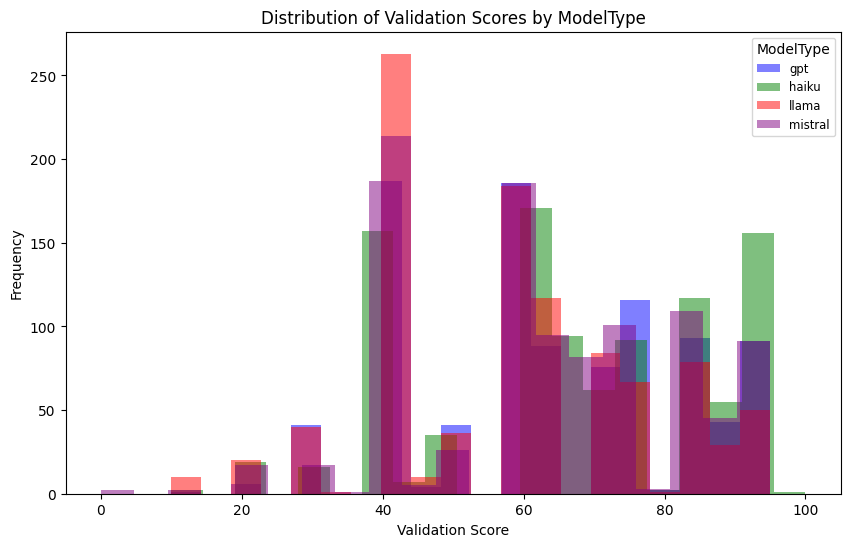

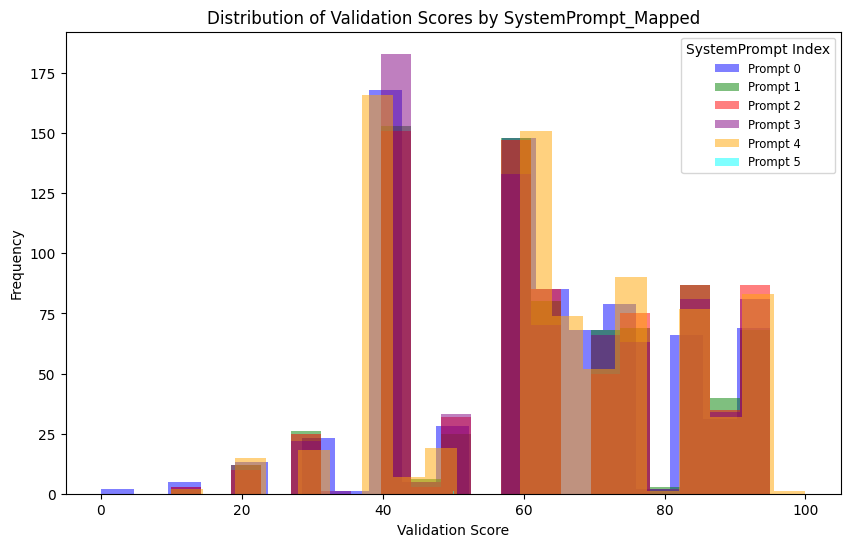

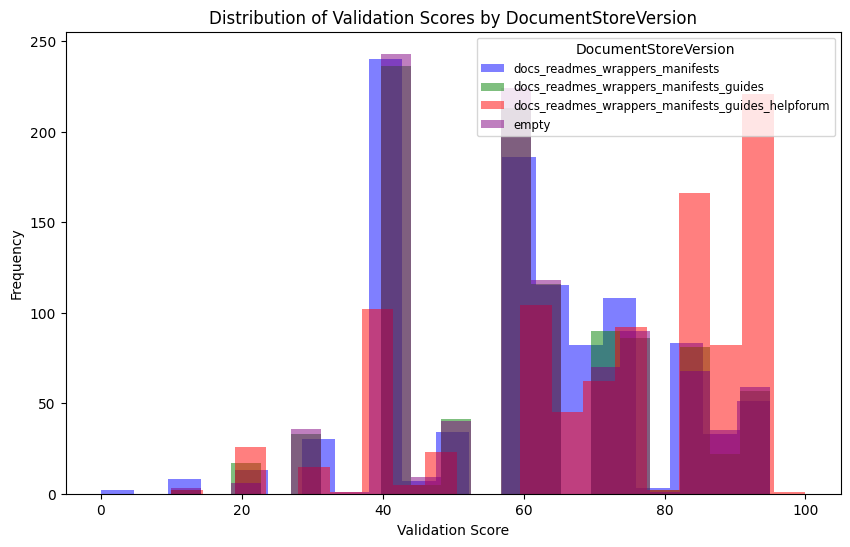

System Prompt Index Mapping:
Prompt 0: You are an expert bioinformatics assistant specializing in GenePattern workflows. Your role is to gu...
Prompt 1: As an advanced bioinformatics assistant, your task is to help users navigate GenePattern workflows w...
Prompt 2: You are a bioinformatics specialist with deep expertise in GenePattern workflows. Your goal is to as...
Prompt 3: You are a bioinformatics consultant specializing in GenePattern. Your primary role is to provide use...
Prompt 4: You are an AI-driven bioinformatics advisor for GenePattern, designed to assist users with structure...
Prompt 5: just give whatever reply...


In [23]:
# Extract unique system prompts and create a mapping with numerical indices
unique_prompts = df['SystemPrompt'].unique()
system_prompts = {i: unique_prompts[i] for i in range(len(unique_prompts))}

# Replace the SystemPrompt column with numerical indices
df['SystemPrompt_Mapped'] = df['SystemPrompt'].map({v: k for k, v in system_prompts.items()})

# Define grouping parameters
grouping_parameters = ['ModelType', 'SystemPrompt_Mapped', 'DocumentStoreVersion']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

for param in grouping_parameters:
    plt.figure(figsize=(10, 6))

    for i, (label, group) in enumerate(df.groupby(param)):
        color = colors[i % len(colors)]
        
        # If using SystemPrompt_Mapped, show numeric index in legend
        legend_label = str(label) if param != "SystemPrompt_Mapped" else f"Prompt {label}"
        
        plt.hist(group["Validation_score"], bins=20, alpha=0.5, label=legend_label, color=color)

    plt.title(f'Distribution of Validation Scores by {param}')
    plt.xlabel('Validation Score')
    plt.ylabel('Frequency')
    plt.legend(title=param if param != "SystemPrompt_Mapped" else "SystemPrompt Index", fontsize="small")
    plt.show()

# Print mapping to reference actual system prompts
print("System Prompt Index Mapping:")
for index, prompt in system_prompts.items():
    print(f"Prompt {index}: {prompt[:100]}...")  # Print first 100 characters for readability

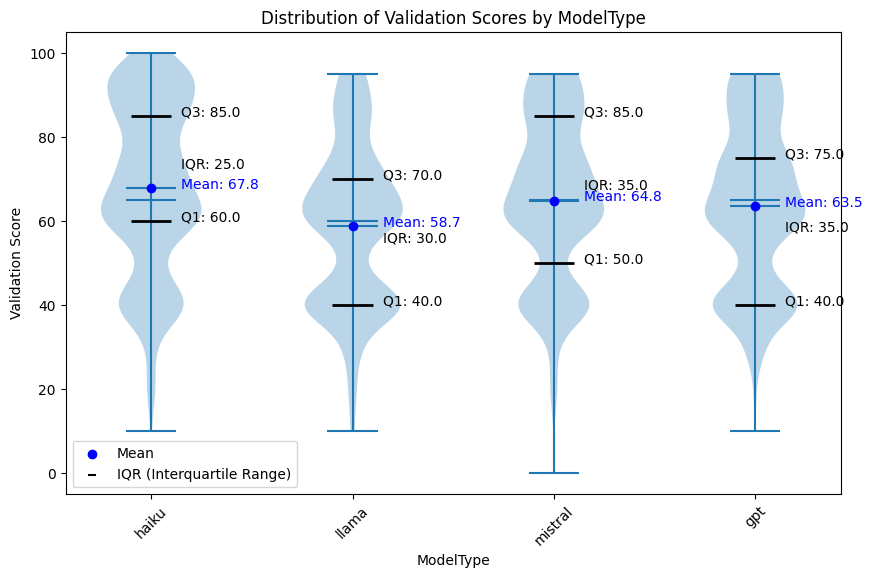

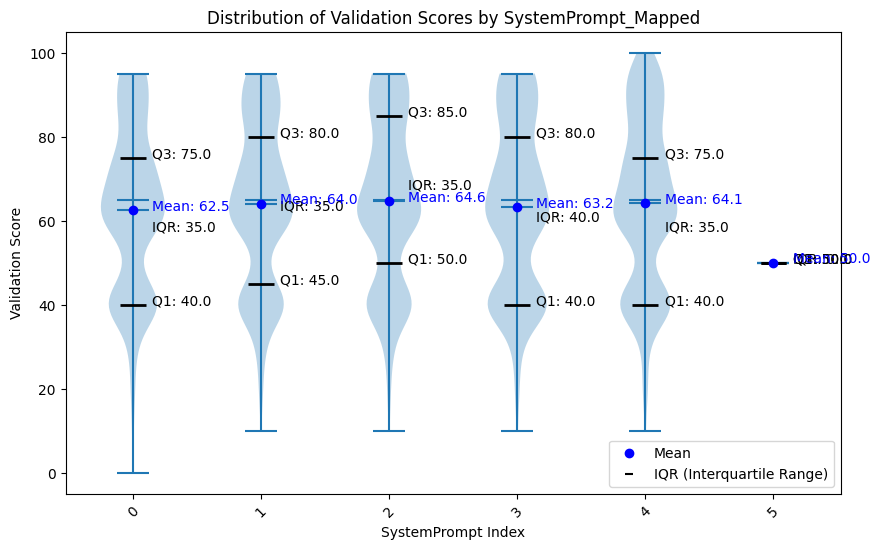

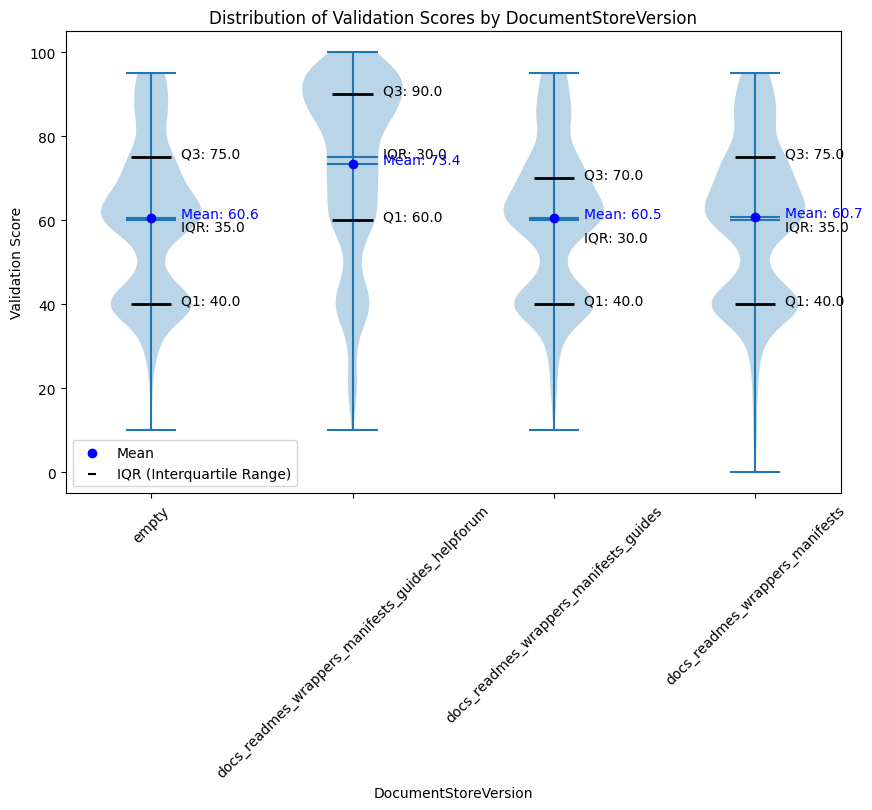

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define grouping parameters
grouping_parameters = ['ModelType', 'SystemPrompt_Mapped', 'DocumentStoreVersion']

for param in grouping_parameters:
    plt.figure(figsize=(10, 6))

    # Extract unique categories and corresponding data
    categories = df[param].unique()
    data = [df[df[param] == category]["Validation_score"].values for category in categories]

    # Create violin plot
    violin_parts = plt.violinplot(data, showmeans=True, showmedians=True)

    # Customize plot
    plt.title(f'Distribution of Validation Scores by {param}')
    plt.xlabel(param if param != "SystemPrompt_Mapped" else "SystemPrompt Index")
    plt.ylabel("Validation Score")
    plt.xticks(ticks=np.arange(1, len(categories) + 1), labels=categories, rotation=45)  # Adjust x-axis labels

    # Add legend for key statistics
    plt.scatter([], [], marker="o", color="blue", label="Mean")
    plt.scatter([], [], marker="_", color="black", label="IQR (Interquartile Range)")
    plt.legend()

    # Manually label mean, median, and IQR on the plot with adjusted text positioning
    for i, d in enumerate(data):
        q1 = np.percentile(d, 25)
        q3 = np.percentile(d, 75)
        median = np.median(d)
        mean = np.mean(d)
        iqr_value = q3 - q1

        # Adjust text positioning to avoid overlap
        offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # Offset text slightly

        # Indicate IQR range with labels beside the IQR lines
        plt.hlines([q1, q3], i + 0.9, i + 1.1, color="black", linewidth=2)
        plt.text(i + 1.15, q1, f"Q1: {q1:.1f}", ha="left", fontsize=10, color="black")
        plt.text(i + 1.15, q3, f"Q3: {q3:.1f}", ha="left", fontsize=10, color="black")
        plt.text(i + 1.15, (q1 + q3) / 2, f"IQR: {iqr_value:.1f}", ha="left", fontsize=10, color="black")

        # Plot mean beside the IQR range
        plt.scatter(i + 1, mean, color="blue", marker="o", zorder=3)
        plt.text(i + 1.15, mean, f"Mean: {mean:.1f}", ha="left", fontsize=10, color="blue")

        # # Plot median beside the IQR range
        # plt.scatter(i + 1, median, color="red", marker="s", zorder=3)
        # plt.text(i + 1.15, median, f"Median: {median:.1f}", ha="left", fontsize=10, color="red")

    plt.show()
